# Data Visualization

In [2]:
import pandas as pd
import numpy as np
import os
import utilities as utils
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances;


In [3]:
import importlib
importlib.reload(utils)

<module 'utilities' from '/Users/zeyadahmed/Documents/UPEI/2024W/CS4440/Project/ml2/Bacteria-Classification-ML/utilities.py'>

In [36]:
import gc
gc.collect()

12

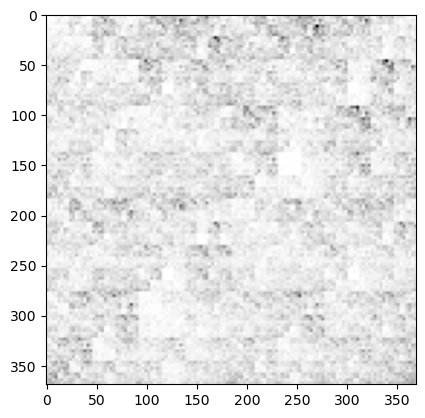

In [37]:
plt.imshow(1-utils.read_cgr_plot('plots/patho/1.png')/255, cmap='gray_r')

In [48]:
dataset = 'plots'

In [49]:
labels = []
cgr_mats = []
patho_labs = []
for dir1 in [dir for dir in os.listdir(dataset) if not dir.startswith('.')]:
    for file in os.listdir(os.path.join(dataset, dir1)):
        path_to_file = os.path.join(dataset,dir1,file)
        tmp = utils.read_cgr_plot(path_to_file)
        cgr_mats.append(tmp)
        if dir1=='patho':
            patho_labs.append(1)
        else:
            patho_labs.append(0)
print(np.array(patho_labs).shape)

(117,)


In [50]:
normalized_mats = [mat/np.max(mat) for mat in cgr_mats]
vector_cgrs = [mat.flatten() for mat in normalized_mats]

In [51]:
np.array(normalized_mats).shape

(117, 369, 369)

In [24]:
for i, mat in enumerate(cgr_mats):
    plt.imshow(mat, aspect='auto', cmap='gray_r', extent=[0, mat.shape[1], mat.shape[0], 0])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axis('off')
    if i < 93:
        plt.savefig(f'./plots/patho/{i+1}.png',  bbox_inches='tight', pad_inches=0)
    else:
        j = i-93
        plt.savefig(f'./plots/non_patho/{j+1}.png', bbox_inches='tight', pad_inches=0)
    plt.close()

In [54]:
D = pairwise_distances(vector_cgrs, metric='manhattan')

In [55]:
np.all(np.diag(D) == 0)

True

In [56]:
np.all(D == D.T)

True

In [57]:
reduced = utils.perform_mds(D, 3, random_state=0)

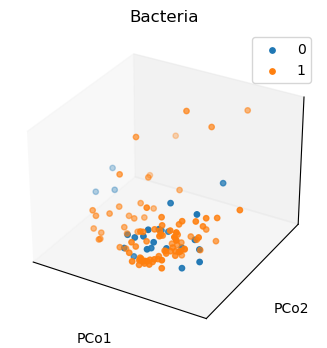

In [58]:
utils.plot_3d(reduced, patho_labs)

In [59]:
normalized_mats = [(mat-np.mean(mat))/np.std(mat) for mat in cgr_mats]
vector_cgrs = [mat.flatten() for mat in normalized_mats]
vector_cgrs = np.array([mat.flatten() for mat in normalized_mats])

In [60]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=3)
pca.fit(vector_cgrs)

# Transform the data to its principal components
transformed_data = pca.transform(vector_cgrs)
comp1 = transformed_data[:, 0]

In [62]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [63]:
clf_rf = RandomForestClassifier(criterion='gini',max_depth=3)
FOLDS = 10
kf = KFold(n_splits=FOLDS, shuffle=True)

In [64]:
accs_rf = []
for train_i, test_j in kf.split(vector_cgrs):
    X_train, X_test = vector_cgrs[train_i], vector_cgrs[test_j]
    y_train, y_test = np.array(patho_labs)[train_i], np.array(patho_labs)[test_j]
    clf_rf.fit(X_train, y_train)
    y_preds = clf_rf.predict(X_test)
    accuracy = 100*accuracy_score(y_test, y_preds)
    accs_rf.append(accuracy)

In [65]:
for i,score in enumerate(accs_rf):
    print(f'Fold {i+1}: {score}')

Fold 1: 91.66666666666666
Fold 2: 100.0
Fold 3: 100.0
Fold 4: 91.66666666666666
Fold 5: 91.66666666666666
Fold 6: 91.66666666666666
Fold 7: 100.0
Fold 8: 100.0
Fold 9: 72.72727272727273
Fold 10: 72.72727272727273


In [66]:
X_tr, X_t, y_tr, y_t = train_test_split(vector_cgrs, patho_labs)

In [68]:
clf_rf.fit(X_tr, y_tr)

RandomForestClassifier(max_depth=3)

In [69]:
np.mean(clf_rf.predict(X_t) == y_t)

0.9333333333333333

In [70]:
print(np.mean(accs_rf))

91.21212121212122
